In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/las_data_07052025_moi.csv')

In [3]:
df

,P32_ALL,DIFFRACTION_ALL,INVERSION_AI,FAULTS,VREZY,TOLSCHI,FUNDAMENT,PROVODKA,DH_B_R0,DIFFRACTION_ALL_SM,...,STACK_MINUS_MIN_DIFFRACTION,STACK_MULT_MAX_DIFFRACTION,STACK_MULT_MIN_DIFFRACTION,PERV,INVERSION_AI_COLL,THICKNESS_R0_R4,RMS_AMPLITUDE,FAULTS_PROBABILITY,FAULTS_AND_FAULTS_PROBABILITY,WELL
0,0.132920,1.049284,19325.851563,1784.564575,4938.076172,815.308166,11277.800781,75.933044,197.450989,1.772000,...,8.370597,3.945613,0.086009,9.519876,19336.494141,251.415802,4.282096e+06,237.863495,237.863495,0
1,0.142031,1.239185,19349.767578,1789.682373,4944.075195,818.338806,11270.271484,76.896500,197.069885,1.776122,...,9.889516,5.489905,0.094882,9.443374,19357.201172,251.768219,4.380322e+06,241.847443,241.847443,0
2,0.149717,1.418291,19369.500000,1794.800415,4950.234375,821.413330,11262.738281,77.851990,196.685364,1.779729,...,11.318880,6.996238,0.093055,9.370024,19374.078125,252.128952,4.458051e+06,245.820221,245.820221,0
3,0.172450,1.481024,19382.138672,1799.953125,4955.683594,824.730713,11255.210938,78.557953,196.288666,1.780724,...,11.771313,7.367435,0.150774,9.340393,19384.705078,252.520081,4.506868e+06,250.683151,250.683151,0
4,0.216702,1.546035,19388.146484,1805.127930,4961.155762,828.043701,11247.694336,79.096062,195.891785,1.781127,...,12.230127,7.781832,0.231702,9.317531,19388.863281,252.922546,4.536850e+06,255.553436,255.553436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,0.577156,1.425760,17871.705078,3044.715576,155.427002,966.440979,19300.248047,68.245590,199.006485,1.391226,...,11.619774,4.343143,0.293712,4.215764,18761.986328,900.279358,8.548471e+05,787.687134,787.687134,65
4968,0.681779,1.378630,17940.484375,3035.032959,155.937302,957.433289,19309.488281,68.162727,198.974976,1.386443,...,11.308958,3.942635,0.281760,4.237915,18816.396484,900.519043,8.745455e+05,783.972656,783.972656,65
4969,0.727493,1.345673,18005.558594,3025.327393,156.434326,948.371948,19318.703125,68.104919,198.952133,1.381845,...,11.221828,3.683351,0.226237,4.258827,18866.650391,900.775330,8.872424e+05,780.352478,780.352478,65
4970,0.776045,1.321094,18065.039063,3015.620361,156.924973,939.295593,19327.929688,68.069046,198.920044,1.377427,...,11.284173,3.552176,0.138151,4.277337,18912.361328,901.035034,8.938501e+05,776.734375,776.734375,65


In [4]:
df.describe()

,P32_ALL,DIFFRACTION_ALL,INVERSION_AI,FAULTS,VREZY,TOLSCHI,FUNDAMENT,PROVODKA,DH_B_R0,DIFFRACTION_ALL_SM,...,STACK_MINUS_MIN_DIFFRACTION,STACK_MULT_MAX_DIFFRACTION,STACK_MULT_MIN_DIFFRACTION,PERV,INVERSION_AI_COLL,THICKNESS_R0_R4,RMS_AMPLITUDE,FAULTS_PROBABILITY,FAULTS_AND_FAULTS_PROBABILITY,WELL
count,4230.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,...,4901.000000,4901.000000,4901.000000,4873.000000,4901.000000,4901.000000,4.901000e+03,4901.000000,4901.000000,4972.000000
mean,1.809619,1.736075,18291.985807,931.004511,1747.983385,1347.736570,11973.162096,73.488504,200.418084,1.756749,...,13.583504,7.316650,0.596189,6.607442,18439.073464,349.419200,5.554998e+06,489.547263,338.184504,29.715607
std,1.442787,0.462566,2209.110904,691.673935,1557.391480,1242.008772,3735.625794,24.508393,14.526581,0.222432,...,3.574316,4.013755,0.629309,1.728981,1530.791460,167.529644,7.979696e+06,479.786909,335.506074,17.348638
min,0.000000,0.576553,0.000000,5.954316,0.000000,11.068332,2642.927246,-6.234059,172.162231,1.058805,...,4.592951,0.818420,-0.052377,0.627867,15000.000000,95.546898,0.000000e+00,7.913165,6.474114,0.000000
25%,0.711279,1.413965,17453.275391,350.012695,313.550537,301.318268,9697.782227,57.980930,190.498688,1.625531,...,11.085872,4.508907,0.236024,5.412459,17410.333984,232.610779,9.479224e+05,92.424637,66.530807,15.000000
50%,1.461522,1.689885,18442.767578,821.722534,1385.240845,1060.234985,11481.564453,81.463768,197.375092,1.739743,...,13.231171,6.443330,0.431567,6.495466,18482.599609,322.314911,3.073786e+06,365.034515,202.059082,30.000000
75%,2.567773,2.023088,19393.230469,1302.061890,2987.791992,1841.347900,14022.536133,92.271515,206.041107,1.885058,...,15.802708,9.229954,0.754146,7.781390,19400.466797,432.189362,6.775250e+06,725.312317,560.677002,43.000000
max,9.041335,4.035190,23773.076172,3189.070801,5321.745117,4820.676758,35472.953125,111.204109,257.692749,2.789323,...,31.205990,30.849874,9.603401,11.785281,23803.951172,1039.263428,8.554933e+07,2585.243164,1609.672119,65.000000


In [5]:
df.isnull().sum()

,0
P32_ALL,742
DIFFRACTION_ALL,71
INVERSION_AI,71
FAULTS,71
VREZY,71
TOLSCHI,71
FUNDAMENT,71
PROVODKA,71
DH_B_R0,71
DIFFRACTION_ALL_SM,71


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

,0
P32_ALL,0
DIFFRACTION_ALL,0
INVERSION_AI,0
FAULTS,0
VREZY,0
TOLSCHI,0
FUNDAMENT,0
PROVODKA,0
DH_B_R0,0
DIFFRACTION_ALL_SM,0


In [8]:
print(df['WELL'].nunique())

61


In [9]:
df = df.copy()
df['P32_class'] = (df['P32_ALL'] >= 2.5).astype(int)

In [10]:
unique_wells = df['WELL'].unique()

In [11]:
train_wells, test_wells = train_test_split(unique_wells, test_size=0.2, random_state=42)

In [12]:
train_df = df[df['WELL'].isin(train_wells)].copy()
test_df = df[df['WELL'].isin(test_wells)].copy()

# Вариант без балансировки

In [13]:
print(train_df['P32_class'].value_counts())

P32_class
0    2362
1     915
Name: count, dtype: int64


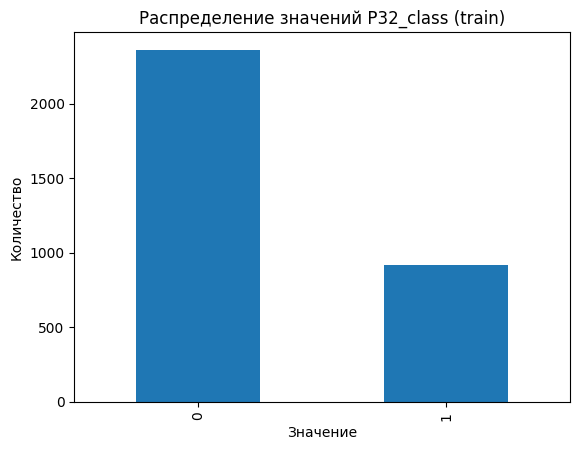

In [14]:
train_df['P32_class'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение значений P32_class (train)')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [15]:
print(test_df['P32_class'].value_counts())

P32_class
0    685
1    184
Name: count, dtype: int64


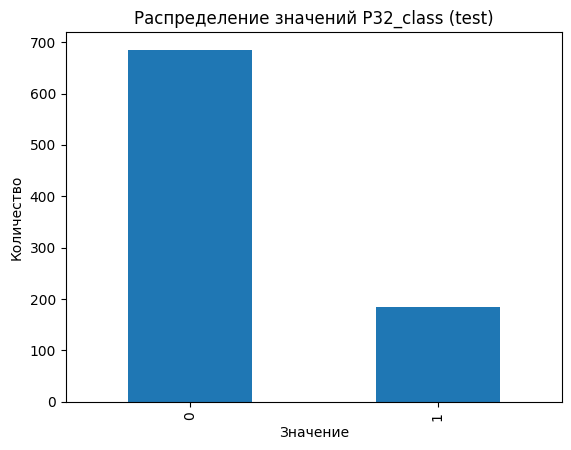

In [16]:
test_df['P32_class'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение значений P32_class (test)')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.xticks([0, 1], ['0', '1'])
plt.show()

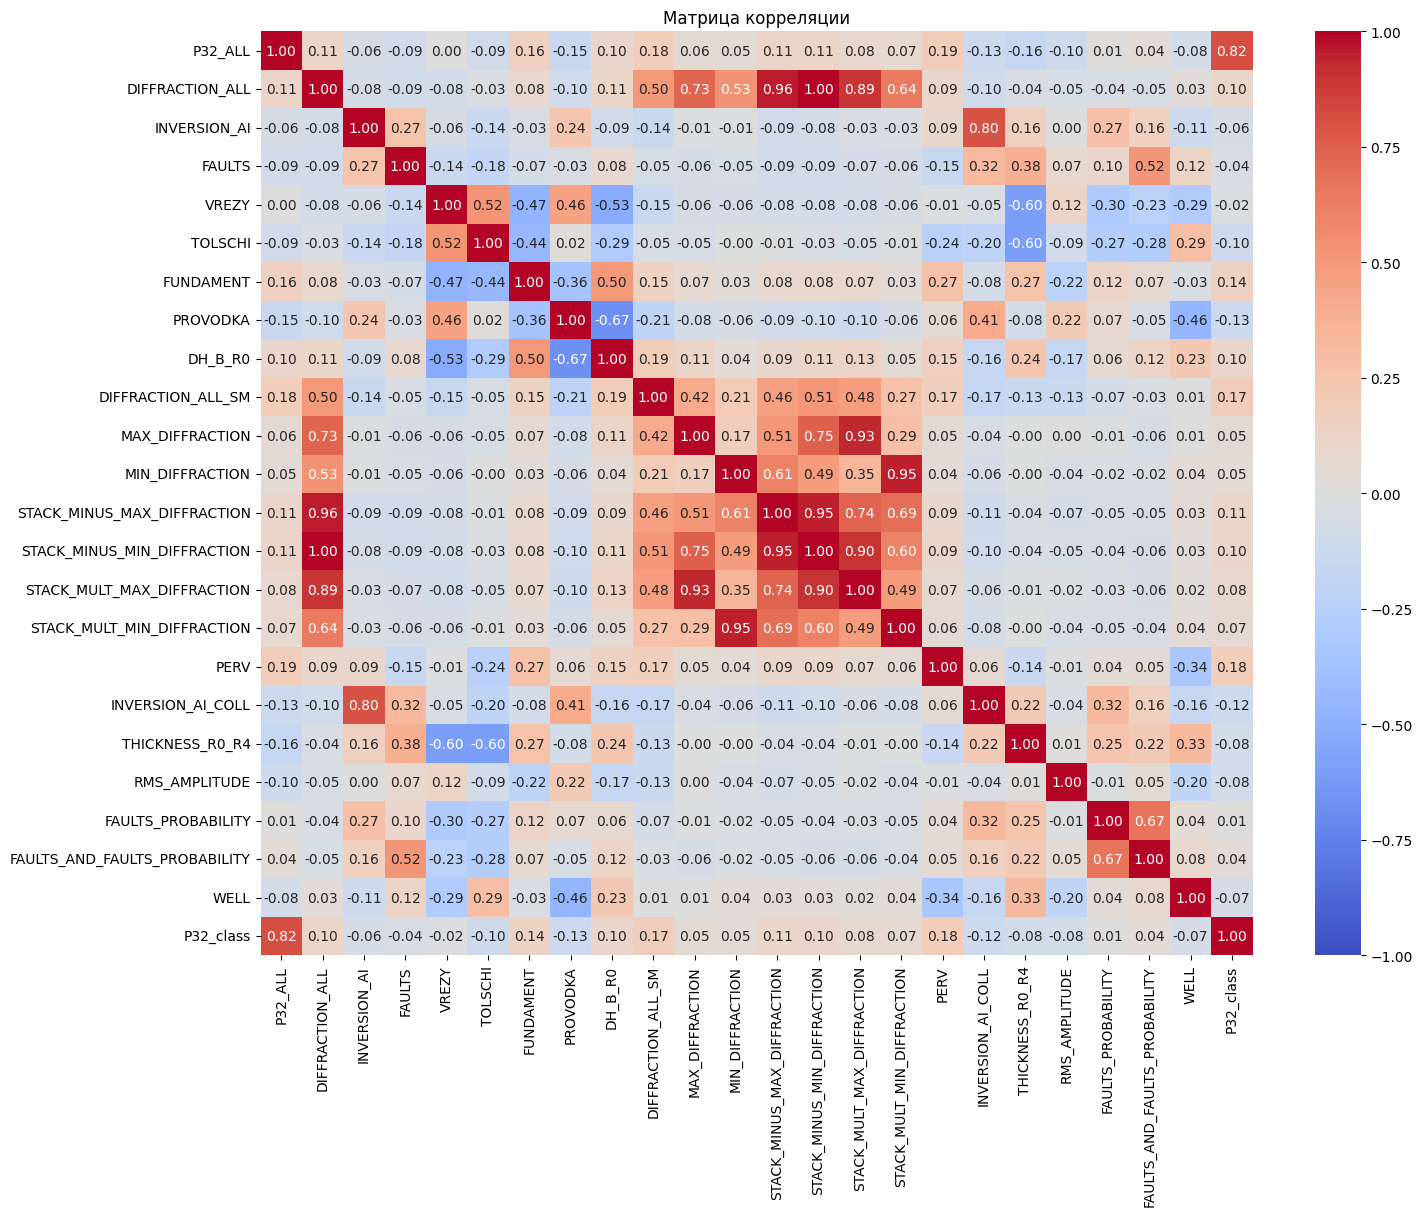

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Матрица корреляции')
plt.show()

In [18]:
#лучший вариант
X_train = train_df[['DIFFRACTION_ALL','INVERSION_AI','TOLSCHI', 'FUNDAMENT', 'THICKNESS_R0_R4','PERV']]
y_train = train_df['P32_class']

X_test = test_df[['DIFFRACTION_ALL','INVERSION_AI','TOLSCHI', 'FUNDAMENT', 'THICKNESS_R0_R4','PERV']]
y_test = test_df['P32_class']

In [19]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [ 3, 5, 8]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV( gb, param_grid, cv=3, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Лучшие параметры:', grid_search.best_params_)

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [20]:
model = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)

In [21]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [22]:
print(model.feature_importances_)

[0.03906848 0.15429239 0.20067422 0.24138917 0.24960641 0.11496933]


In [23]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [24]:
print("Метрики для тестовой выборки")
print("Accuracy:", accuracy_score (y_test,y_pred_test))
print("ROC AUC:", roc_auc_score (y_test,y_pred_test))
print("Precision:", precision_score (y_test,y_pred_test))
print("Recall:", recall_score (y_test,y_pred_test))
print("f1:", f1_score (y_test,y_pred_test))

Метрики для тестовой выборки
Accuracy: 0.7813578826237054
ROC AUC: 0.6983417962551572
Precision: 0.4857142857142857
Recall: 0.5543478260869565
f1: 0.5177664974619289


In [25]:
print("Метрики для обучающей выборки")
print("Accuracy:", accuracy_score (y_train, y_pred_train ))
print("ROC AUC:", roc_auc_score (y_train, y_pred_train ))
print("Precision:", precision_score (y_train, y_pred_train ))
print("Recall:", recall_score (y_train, y_pred_train ))
print("f1:", f1_score (y_train, y_pred_train ))

Метрики для обучающей выборки
Accuracy: 0.8950259383582545
ROC AUC: 0.8337814577809859
Precision: 0.9072753209700428
Recall: 0.6950819672131148
f1: 0.7871287128712872


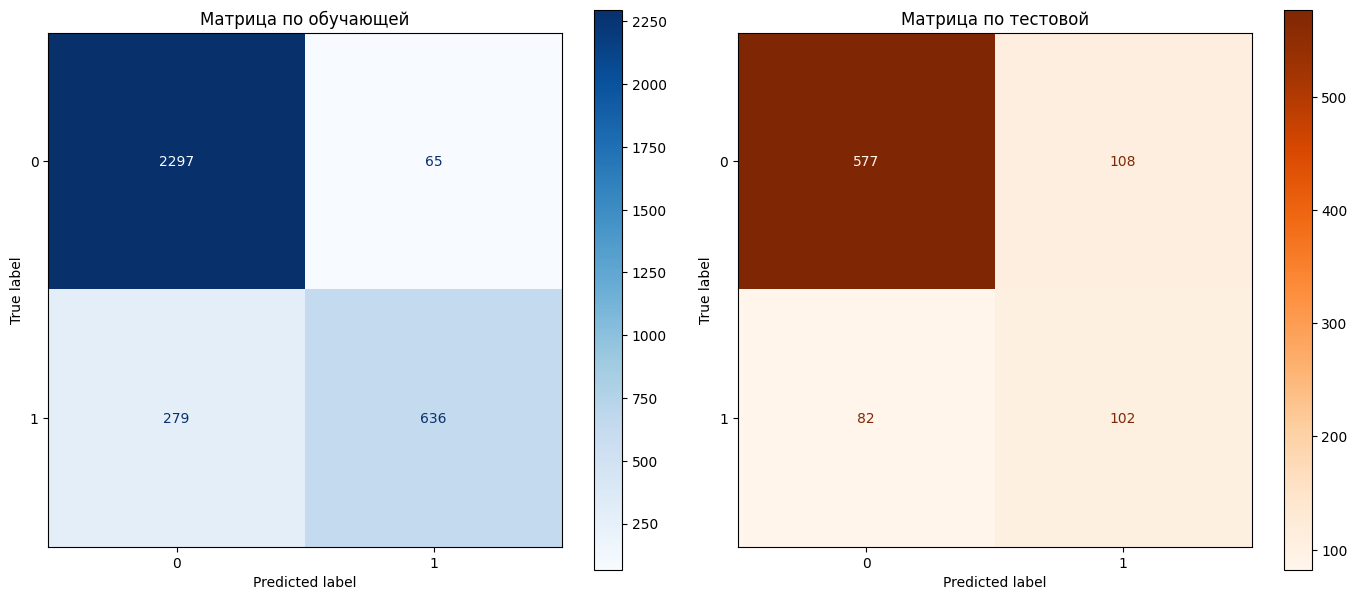

In [26]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[0], cmap='Blues')
ax[0].set_title('Матрица по обучающей')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[1], cmap='Oranges')
ax[1].set_title('Матрица по тестовой')
plt.tight_layout()
plt.show()

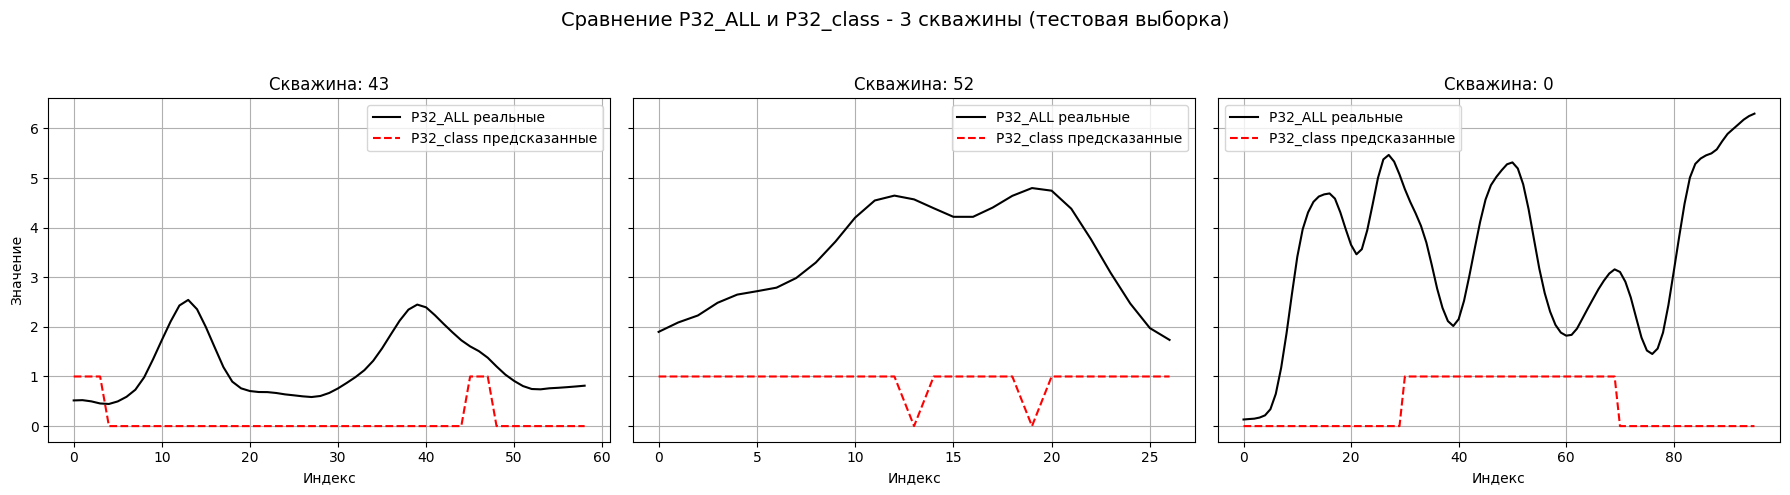

In [27]:
test_wells_sample = random.sample(list(test_df['WELL'].unique()), k=3)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, well in enumerate(test_wells_sample):
    ax = axes[i]
    well_data = test_df[test_df['WELL'] == well].copy()
    well_data = well_data.sort_index()
    y_true = well_data['P32_ALL']
    y_pred_series = pd.Series(y_pred_test, index=X_test.index).loc[well_data.index]

    ax.plot(y_true.values, label='P32_ALL реальные', color='black')
    ax.plot(y_pred_series.values, label='P32_class предсказанные', color='red', linestyle='--')
    ax.set_title(f'Скважина: {well}')
    ax.set_xlabel('Индекс')
    if i == 0:
        ax.set_ylabel('Значение')
    ax.grid(True)
    ax.legend()

plt.suptitle('Сравнение P32_ALL и P32_class - 3 скважины (тестовая выборка)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

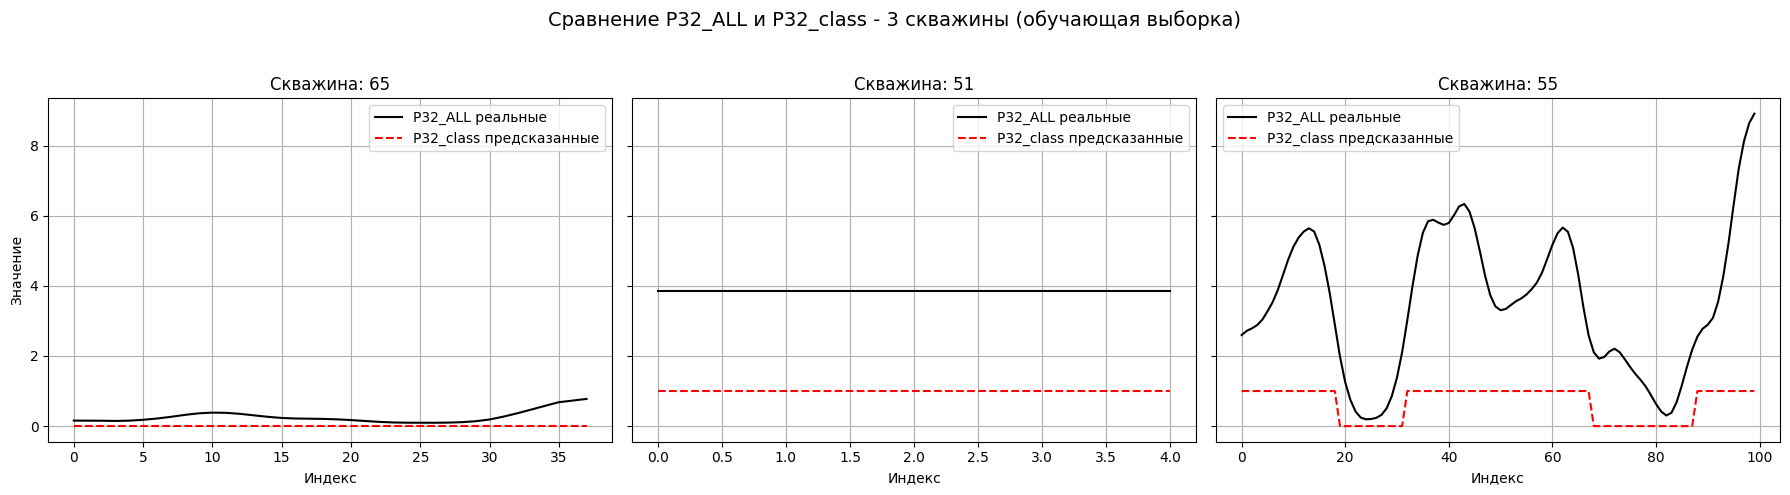

In [28]:
train_wells_sample = random.sample(list(train_df['WELL'].unique()), k=3)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, well in enumerate(train_wells_sample):
    ax = axes[i]
    well_data = train_df[train_df['WELL'] == well].copy()
    well_data = well_data.sort_index()
    y_true = well_data['P32_ALL']
    y_pred_series = pd.Series(y_pred_train, index=X_train.index).loc[well_data.index]

    ax.plot(y_true.values, label='P32_ALL реальные', color='black')
    ax.plot(y_pred_series.values, label='P32_class предсказанные', color='red', linestyle='--')
    ax.set_title(f'Скважина: {well}')
    ax.set_xlabel('Индекс')
    if i == 0:
        ax.set_ylabel('Значение')
    ax.grid(True)
    ax.legend()

plt.suptitle('Сравнение P32_ALL и P32_class - 3 скважины (обучающая выборка)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Вариант с балансировкой по обучающейся выборке

In [29]:
def balance_dataset(df, target_col, reduction_ratio=0.5):
    class_0 = df[df[target_col] == 0]
    class_1 = df[df[target_col] == 1]
    if len(class_0) > len(class_1):
        majority_class = class_0
        minority_class = class_1
    else:
        majority_class = class_1
        minority_class = class_0

    reduced_size = int(len(majority_class) * reduction_ratio)

    majority_downsampled = resample(majority_class, replace=False, n_samples=reduced_size, random_state=42)
    balanced_df = pd.concat([majority_downsampled, minority_class], axis=0)
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    return balanced_df

In [30]:
train_df_balanced = balance_dataset(train_df, 'P32_class')

In [31]:
print(train_df_balanced['P32_class'].value_counts())

P32_class
0    1181
1     915
Name: count, dtype: int64


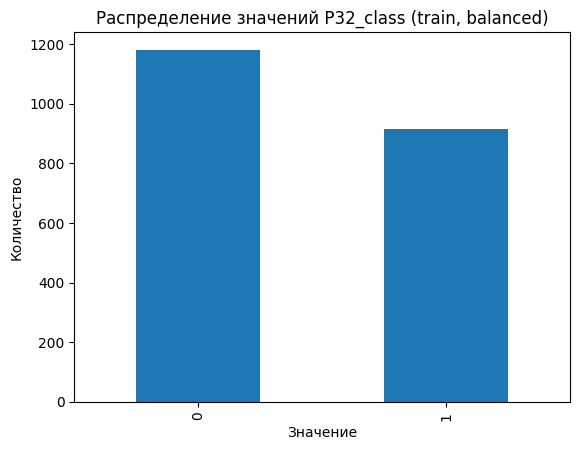

In [32]:
train_df_balanced['P32_class'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение значений P32_class (train, balanced)')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [33]:
print(test_df['P32_class'].value_counts())

P32_class
0    685
1    184
Name: count, dtype: int64


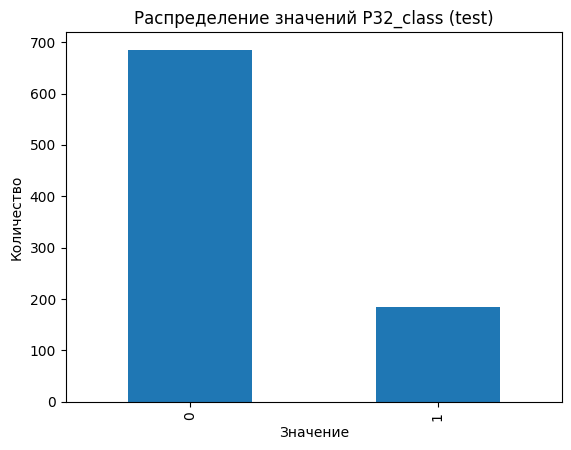

In [34]:
test_df['P32_class'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение значений P32_class (test)')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [35]:
X_train_balanced = train_df_balanced[['DIFFRACTION_ALL','INVERSION_AI','TOLSCHI', 'FUNDAMENT', 'THICKNESS_R0_R4','PERV']]
y_train_balanced = train_df_balanced['P32_class']

X_test = test_df[['DIFFRACTION_ALL','INVERSION_AI','TOLSCHI', 'FUNDAMENT', 'THICKNESS_R0_R4','PERV']]
y_test = test_df['P32_class']

In [36]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 8]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV( gb, param_grid, cv=3, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Лучшие параметры:', grid_search.best_params_)

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [37]:
model = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)

In [38]:
model.fit(X_train_balanced, y_train_balanced)

GradientBoostingClassifier(random_state=42)

In [39]:
y_pred_test = model.predict(X_test)
y_pred_train_balanced = model.predict(X_train_balanced)

In [40]:
print("Метрики для тестовой выборки")
print("Accuracy:", accuracy_score (y_test,y_pred_test))
print("ROC AUC:", roc_auc_score (y_test,y_pred_test))
print("Precision:", precision_score (y_test,y_pred_test))
print("Recall:", recall_score (y_test,y_pred_test))
print("f1:", f1_score (y_test,y_pred_test))

Метрики для тестовой выборки
Accuracy: 0.5373993095512083
ROC AUC: 0.529685020628372
Precision: 0.23284313725490197
Recall: 0.5163043478260869
f1: 0.32094594594594594


In [41]:
print("Метрики для обучающей сбалансированной выборки")
print("Accuracy:", accuracy_score (y_train_balanced, y_pred_train_balanced ))
print("ROC AUC:", roc_auc_score (y_train_balanced, y_pred_train_balanced ))
print("Precision:", precision_score (y_train_balanced, y_pred_train_balanced ))
print("Recall:", recall_score (y_train_balanced, y_pred_train_balanced ))
print("f1:", f1_score (y_train_balanced, y_pred_train_balanced ))

Метрики для обучающей сбалансированной выборки
Accuracy: 0.896469465648855
ROC AUC: 0.8936054931682422
Precision: 0.8895089285714286
Recall: 0.8710382513661202
f1: 0.8801766979569299


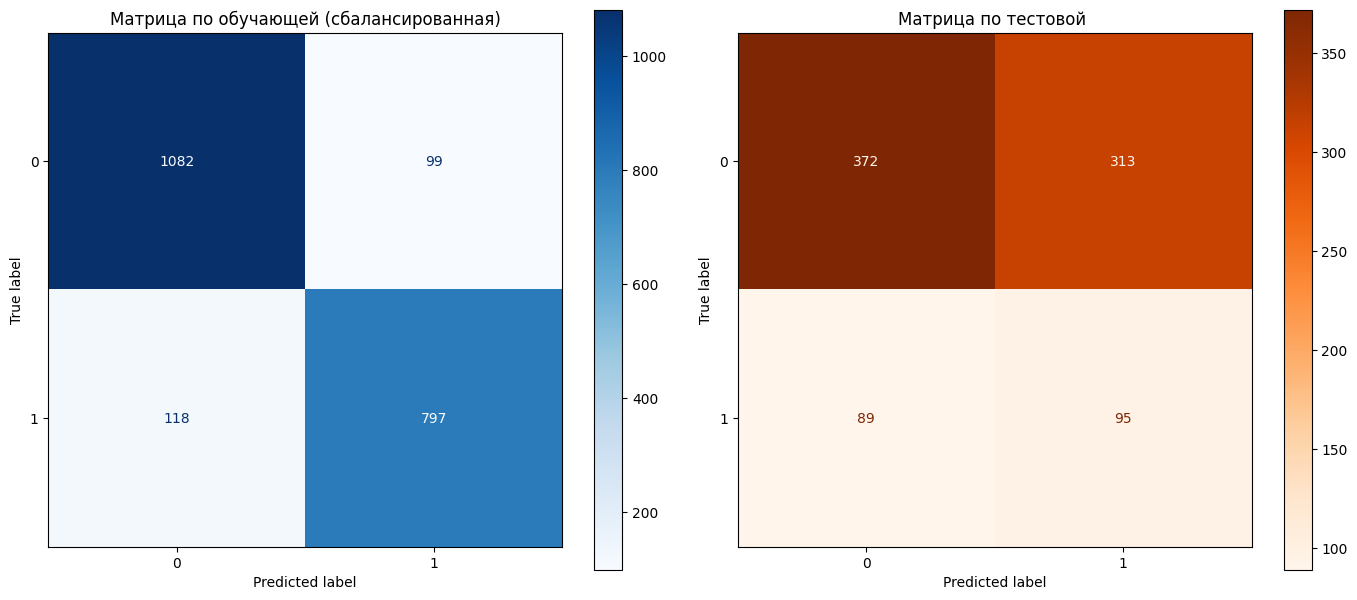

In [42]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_pred_train_balanced, ax=ax[0], cmap='Blues')
ax[0].set_title('Матрица по обучающей (сбалансированная)')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[1], cmap='Oranges')
ax[1].set_title('Матрица по тестовой ')
plt.tight_layout()
plt.show()

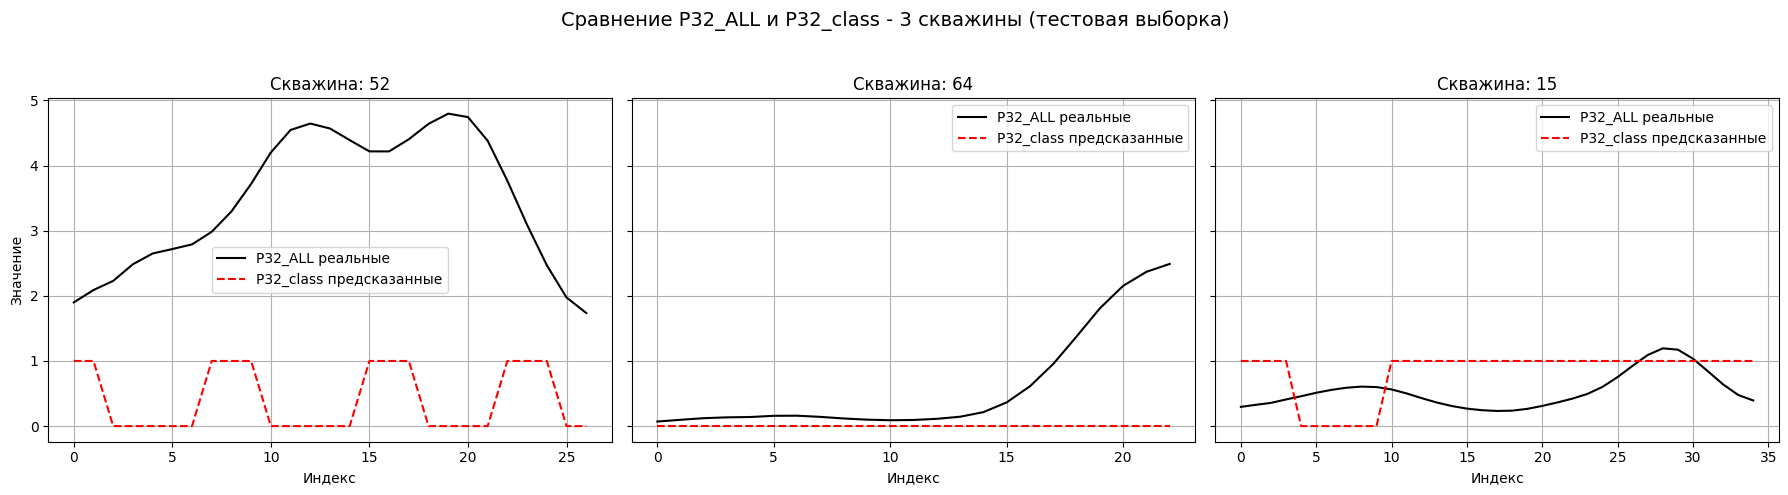

In [43]:
test_wells_sample = random.sample(list(test_df['WELL'].unique()), k=3)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, well in enumerate(test_wells_sample):
    ax = axes[i]
    well_data = test_df[test_df['WELL'] == well].copy()
    well_data = well_data.sort_index()
    y_true = well_data['P32_ALL']
    y_pred_series = pd.Series(y_pred_test, index=X_test.index).loc[well_data.index]

    ax.plot(y_true.values, label='P32_ALL реальные', color='black')
    ax.plot(y_pred_series.values, label='P32_class предсказанные', color='red', linestyle='--')
    ax.set_title(f'Скважина: {well}')
    ax.set_xlabel('Индекс')
    if i == 0:
        ax.set_ylabel('Значение')
    ax.grid(True)
    ax.legend()

plt.suptitle('Сравнение P32_ALL и P32_class - 3 скважины (тестовая выборка)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

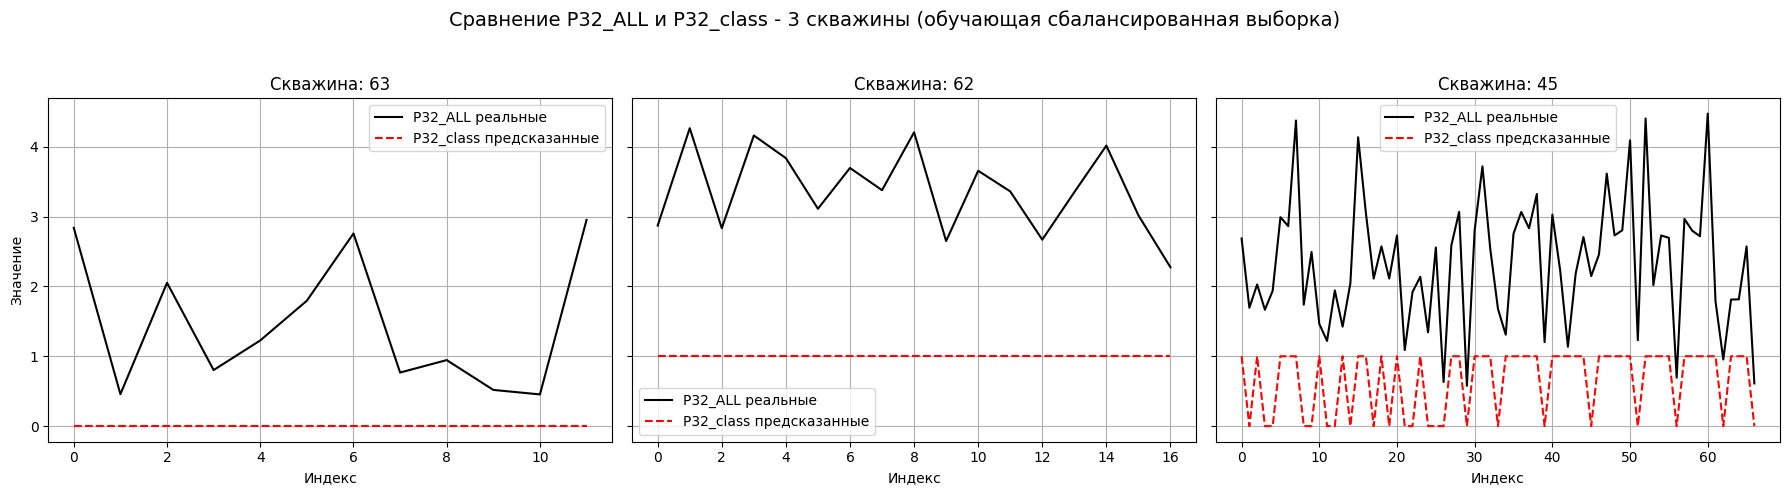

In [44]:
train_wells_sample = random.sample(list(train_df_balanced['WELL'].unique()), k=3)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, well in enumerate(train_wells_sample):
    ax = axes[i]
    well_data = train_df_balanced[train_df_balanced['WELL'] == well].copy()
    well_data = well_data.sort_index()
    y_true = well_data['P32_ALL']
    y_pred_series = pd.Series(y_pred_train_balanced, index=X_train_balanced.index).loc[well_data.index]

    ax.plot(y_true.values, label='P32_ALL реальные', color='black')
    ax.plot(y_pred_series.values, label='P32_class предсказанные', color='red', linestyle='--')
    ax.set_title(f'Скважина: {well}')
    ax.set_xlabel('Индекс')
    if i == 0:
        ax.set_ylabel('Значение')
    ax.grid(True)
    ax.legend()

plt.suptitle('Сравнение P32_ALL и P32_class - 3 скважины (обучающая сбалансированная выборка)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()